# 1. 소상공인시장진흥공단 상가업소

# 2 필요한 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해  numpy를, 시각화를 위해 seaborn을 불러온다
import pandas as pd
import numpy as np
import seaborn as sns

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

# 3 시각화를 위한 한글 폰트 설정하기

In [2]:
# 한글폰트 설정
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")  # 한글폰트 설정
plt.rc("axes", unicode_minus = False)   # 마이너스 폰트 깨지는 문제 해결

In [3]:
# 폰트가 선명하게 보이도록 retina 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글폰트'}>

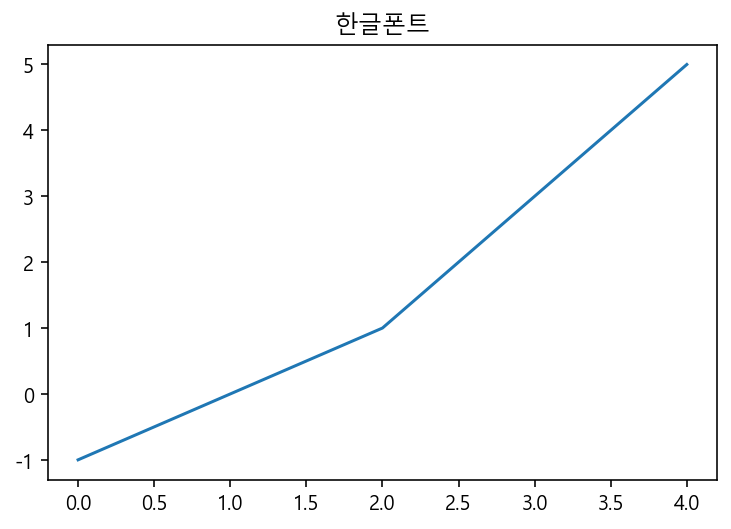

In [4]:
# 한글폰트와 마이너스 폰트 설정 확인

# pd.Series([-1, 0, 1, 3, 5]).plot()  # 그냥 그리게 되면 아무 문제 없음
pd.Series([-1, 0, 1, 3, 5]).plot(title = "한글폰트")  # 한글폰트 설정해주면 폰트가 꺠져서 나옴 -> 따라서 폰트 설정 해줘야댐

# 한글폰트 설정 해줘야 하는 이유

# 4 Google Colab을 위한 코드

# 5 데이터 불러오기

In [5]:
# 파일을 불러와 df 라는 변수에 담아준다
# shape를 통해 불러온 csv 파일의 크기를 확인해준다

# pd.read_csv("data/상가업소정보_201912_01 (1).csv") # 그냥 불러오면 오류 발생
df = pd.read_csv("data/상가업소정보_201912_01 (1).csv", sep='|') # 그냥 불러오면 오류 발생
df.shape

(573680, 39)

### 5.1 데이터 미리보기

In [6]:
# 데이터 불러올때 국룰
# shape으로 데이터 개수 한번 보고, head로 미리보고, info로 정보 확인
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


### 5.2 info 보기

In [7]:
df.info()

# 전체 데이터는 57만개 정도 되는데 
# 예를 들어 23번 지번부번지 처럼 47만개면 결측치가 10만개 정도 되는구나 인지하고 패스

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 5.3 결측치 보기

<AxesSubplot:>

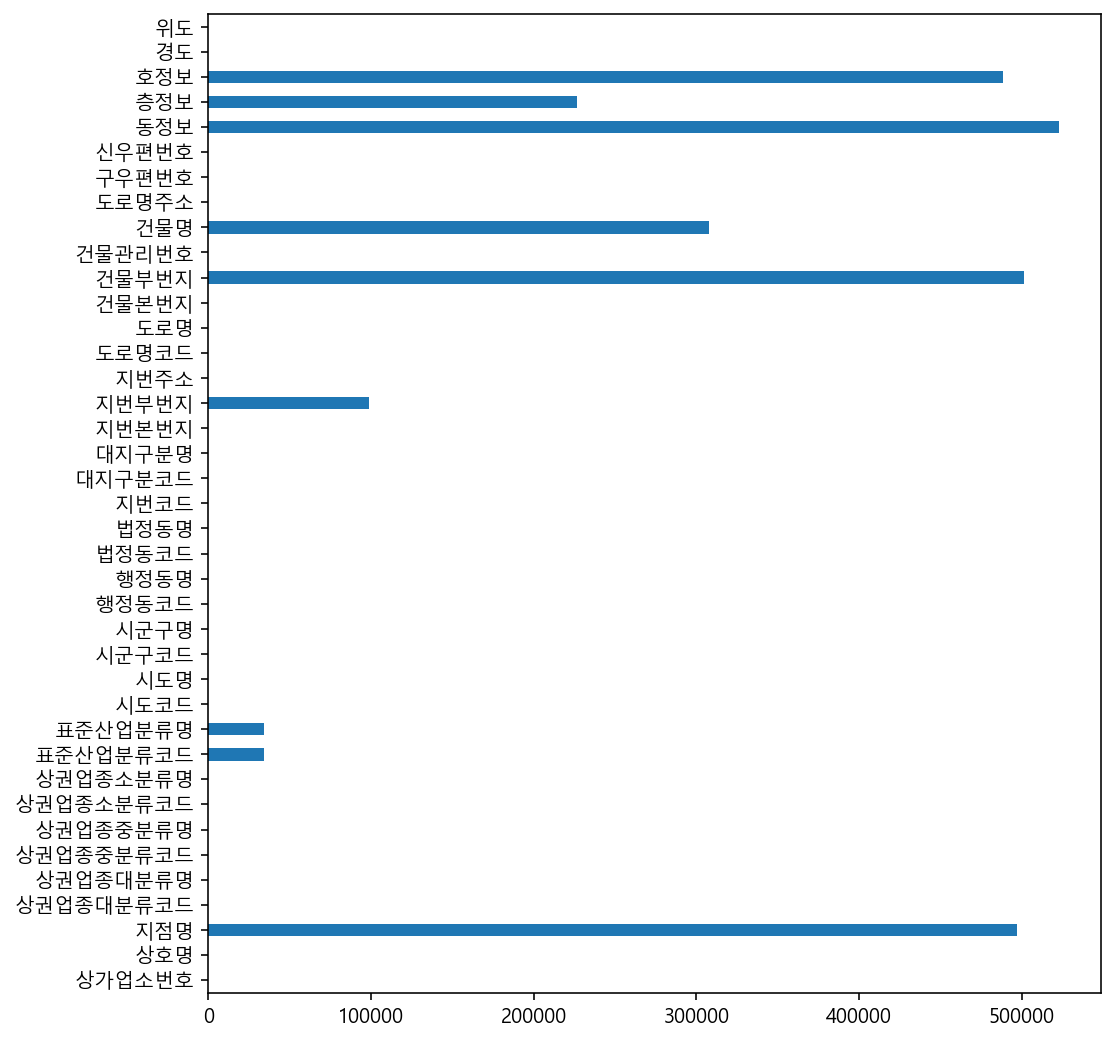

In [8]:
# isnull()을 사용하면 데이터의 결측치를 볼 수 있다
# 결측치는 True로 값이 있다면 False로 표시하는데 True 는 1과 같기 때문에
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있다

# df.isnull().sum()
df.isnull().sum().plot.barh(figsize=(8, 9)) # 결측치를 시각화 해서도 볼 수 있음

### 5.4 사용하지 않는 컬럼 제거하기

In [9]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있다
# 여기에서는 사용할 컬럼만 따로 모아서 사용

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df = df[columns].copy()
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


# 6 색인으로 서브셋 가져오기

### 6.1 서울만 따로보기

In [11]:
# 시도명이 서울로 시작하는 데이터만 보고
# 또, df_seoul 이라는 변수에 결과를 저장
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장

df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(407376, 11)

### 6.2 일부 텍스트가 들어가는 데이터만 가져오기
    * 상호명에서 브랜드명을 추출
    * 대소문자가 섞여 있을 수도 있기 떄문에 대소문자를 변환해준다
    * 오타를 방지하기 위해 스타벅스의 영문명은 STARBUCKS, 이디야는 EDIYA 이다
    

In [12]:
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

# str.lower() -> 대문자를 다 소문자로 변환

In [13]:
# ediya를 "상호명_소문자" 컬럼으로 가져오고
# '상호명_소문자' 컬럼으로 '이디야|ediya' 를 가져와 갯수를 세본다
# loc[행]
# loc[행, 열]

# df_seoul[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya")].shape

# 여기서 상호명만 가지고 오고 싶다
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"), "상호명_소문자"].shape

(543,)

In [14]:
# 상호명에서 스타벅스만 가져온다
# 상호명은 소문자로 변경해 준 컬럼을 사용
# 스타벅스|starbucks 의 "상호명_소문자"로 갯수를 세어보자

# 스타벅스|starbucks 가 포함된 아이들 출력
# df_seoul[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks")]

# 상호명_소문자만 보고 싶다
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks"), "상호명_소문자"].shape


(506,)

In [15]:
# '상호명_소문자' 컬럼으로 '스타벅스|starbucks|이디야|이디아|ediya'를 가져와 df_cafe 변수에 담아준다
df_cafe = df_seoul[df_seoul["상호명_소문자"].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(1049, 12)

In [16]:
# ~은 not을 의미. 스타벅스가 아닌 데이터는 이디야로 넣어주어도 되지만
# 아래 코드처럼 결측치를 이디야로 채워줘도 괜찮

df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
# df_cafe.loc[df_cafe["상호명_소문자"].str.contains('이디야|이디아|ediya'), "브랜드명"] = "이디야"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "이디야"

df_cafe

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
1104,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,이태원1동,이태원동,서울특별시 용산구 이태원로 188,126.994781,37.534303,스타벅스,스타벅스
1675,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야커피,이디야
2023,스타벅스종로3가점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,종로1.2.3.4가동,종로3가,서울특별시 종로구 종로 113-1,126.990207,37.570585,스타벅스종로3가점,스타벅스
2770,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,잠원동,서울특별시 서초구 강남대로 581,127.019763,37.513663,스타벅스,스타벅스
2957,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 43,126.897870,37.484385,이디야커피,이디야
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567090,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,낙성대동,봉천동,서울특별시 관악구 관악로 158,126.952792,37.479298,스타벅스,스타벅스
567828,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성동구,금호4가동,금호동4가,서울특별시 성동구 동호로 99,127.015329,37.548028,스타벅스,스타벅스
568636,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,양재1동,우면동,서울특별시 서초구 바우뫼로 20,127.025274,37.469980,이디야커피,이디야
570096,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서대문구,북아현동,북아현동,서울특별시 서대문구 북아현로 29,126.956144,37.560080,스타벅스,스타벅스


In [17]:
# 스타벅스를 제외한 데이터는 이디야이기 때문에 이디야로 브랜드명을 만들어준다
# df_cafe["브랜드명"].fillna("이디야")

In [18]:
# df_cafe에 담긴 '상호명','브랜드명'으로 미리보기를 해준다
df_cafe[["상호명", "브랜드명"]].head()

,상호명,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


In [19]:
df_cafe[["상호명", "브랜드명"]].tail()

,상호명,브랜드명
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
568636,이디야커피,이디야
570096,스타벅스,스타벅스
571052,스타벅스,스타벅스


### 6.3 시각화

#### 6.3.1 분류별 countplot 그리기

In [20]:
# "상권업종분류명"을 countplot 으로 시각화하고 분류 혹은 데이터가 잘못 색인된 데이터가 있는지 확인해보자
df_cafe["상권업종중분류명"].value_counts()

# value_counts() -> 내가 설정한 조건에 따른 값 표현

커피점/카페       1036
학원-어학           3
광고/인쇄           2
패스트푸드           1
유흥주점            1
기타판매업           1
주유소/충전소         1
종합소매점           1
분양              1
운동/경기용품소매       1
주택수리            1
Name: 상권업종중분류명, dtype: int64

In [21]:
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()
df_cafe.shape

(1036, 13)

In [22]:
# 브랜드명으로 각 카페의 갯수를 세어보자
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

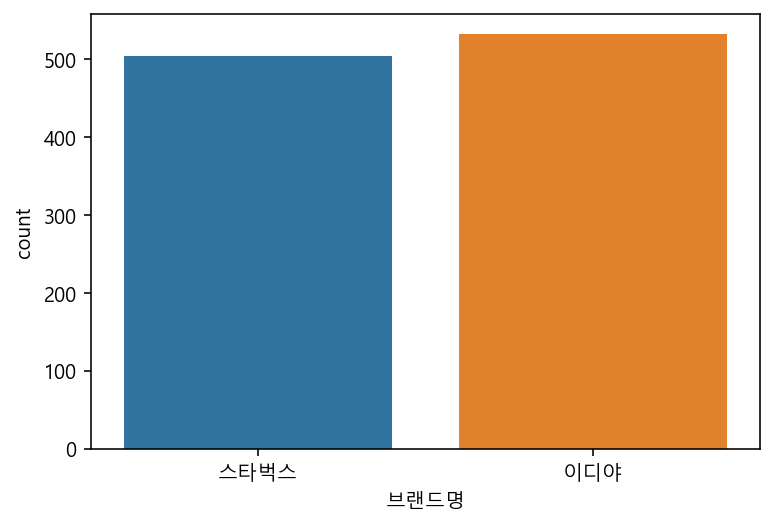

In [23]:
# 브랜드명을 막대그래프로 그려보자
sns.countplot(data=df_cafe, x="브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

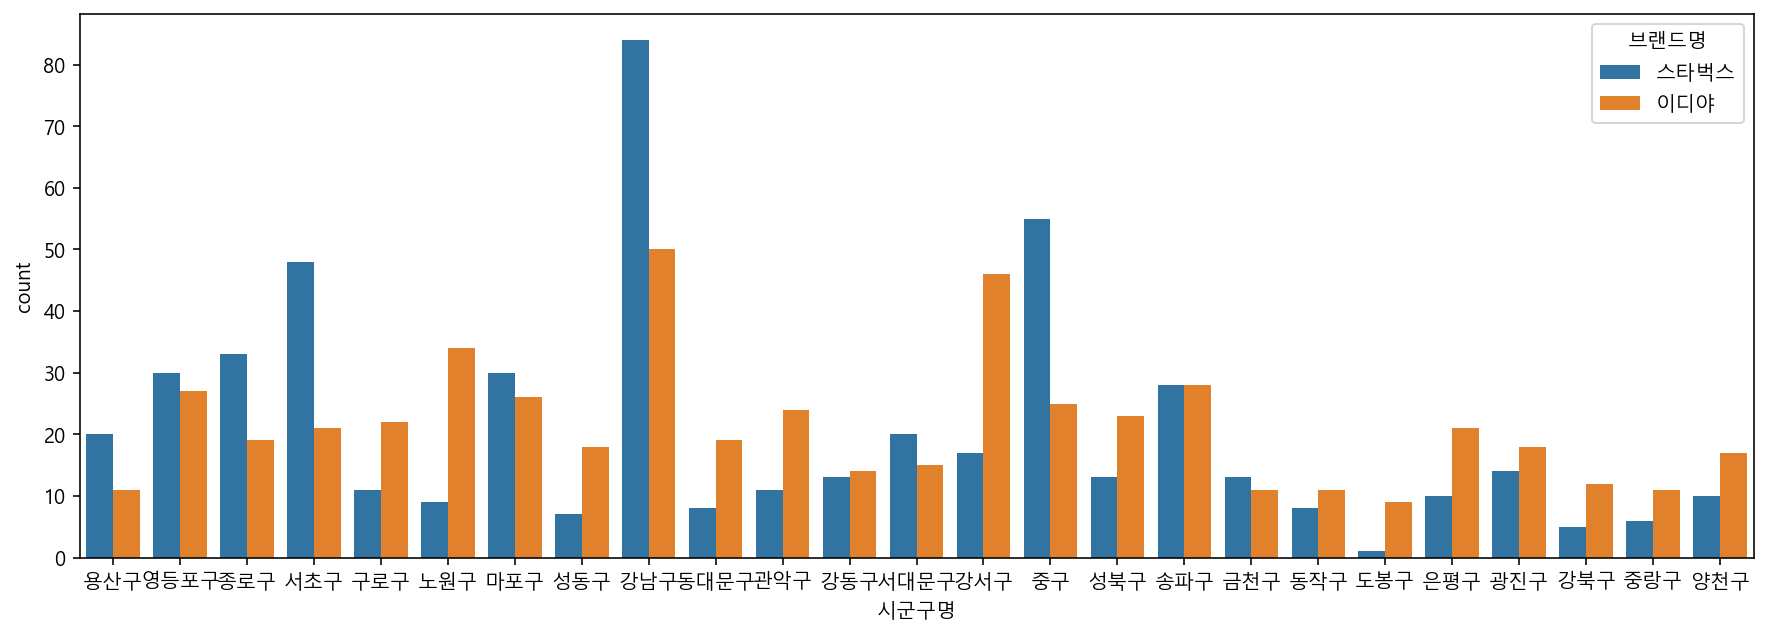

In [24]:
# 브랜드명을 막대그래프로 그려보자
plt.figure(figsize=(15,5))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

#### 6.3.2 scatterplot 그리기

<AxesSubplot:xlabel='경도', ylabel='위도'>

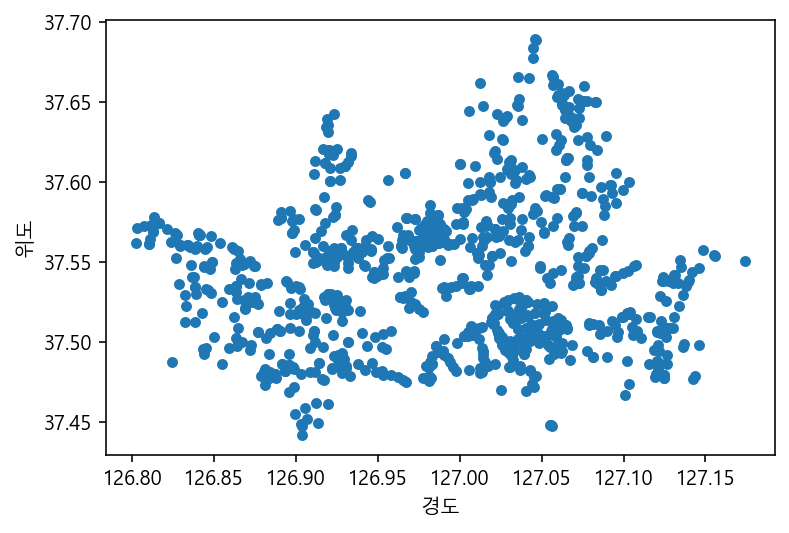

In [25]:
# scatterplot 은 x, y를 지정해줘야 함
# pandas로 scatterplot을 그려보자

# 위도 하나만 가지고 올때는 시리즈형태로 반환이 가능한데
# 위도, 경도 두개 이상 적어버리면 리스트형태로 적어주고, 데이터프레임형태로 가져와야함. 시리즈형태X
df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

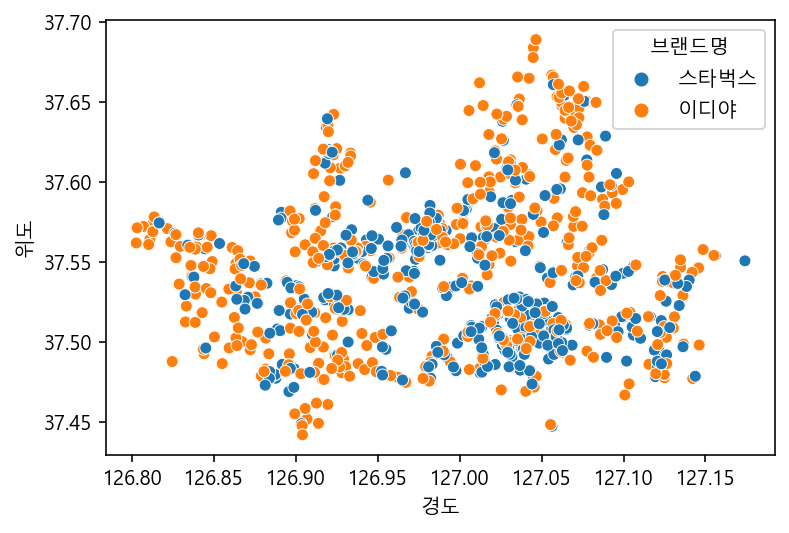

In [26]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화해보자

sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

#### 6.3.3 jountplot 그리기

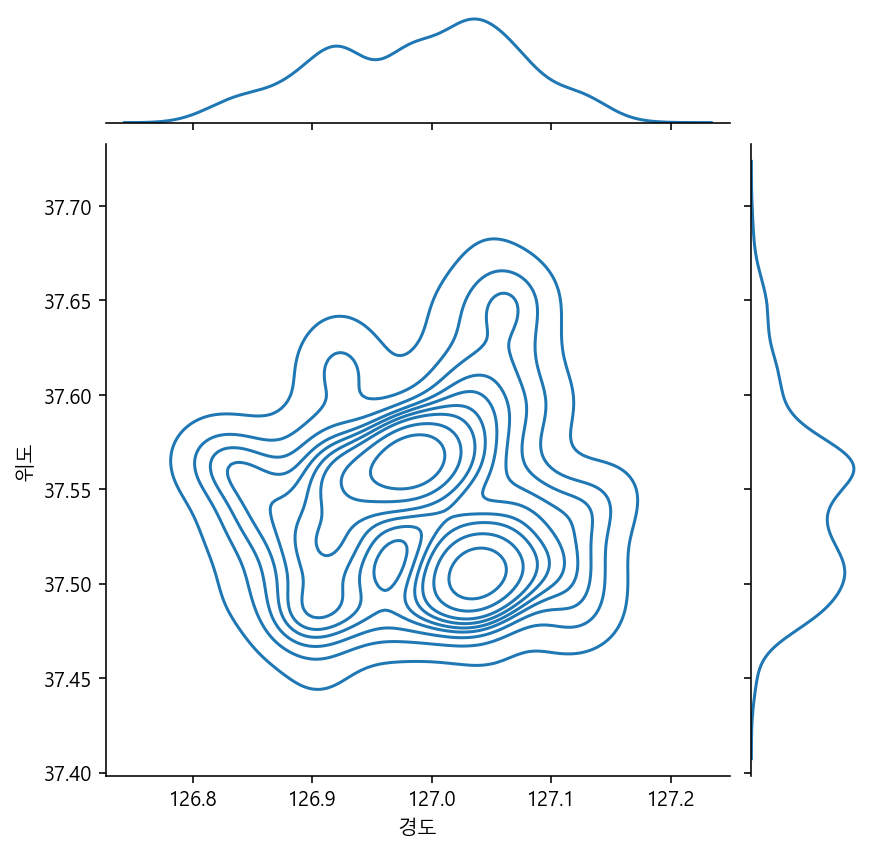

In [27]:
# jointplot 그리기  -> scatterplot + 히스토그램
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde")

# 7 구별 브랜드별 점포수

### 7.1 groupby와 pivot_table로 구별 스타벅스, 이디야 매장 수 구하기 

#### 7.1.1 groupby 로 구별 매장 수 구하기

In [28]:
# 구별로 브랜드별 점포수 구해보고
# groupby를 사용하면 구별로 그룹화해서 점포수를 구할 수 있다
# 그룹화한 결과를 df_cafe_vs 변수에 담아서 재사용

df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [29]:
# 데이터 프레임 만드는 방법

# 첫번째 방법 - 컬럼, 인덱스 두가지로 나뉘게 됨
# df_cafe_vs.to_frame()

#두번째 방법 - 애는 컬럼으로 오고  -> 권장
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [30]:
# reset_index로 인덱스를 컬럼으로 만든다

In [31]:
# groupby '시군구명', '브랜드명' 으로 갯수를 세어보고
# 결과에 대한 데이터프레임 컬럼명을 ['구', '브랜드명', '매장수'] 로 지정해준다

df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


#### 7.1.2 pivot_table 로 구별 매장수 구하기

In [32]:
# 위에서 했던 과정을 pivot_table 로 구해보자
# pivot 과 pivot_table의 가장 큰 차이점은 pivot은 연산을 할 수가 없음, agg(어그리게이션)의 유무

pivot = pd.pivot_table(data= df_cafe, index=["시군구명", "브랜드명"], values="상호명", aggfunc="count")
# aggfunc 의 초기값이 mean으로 되어있는데 value값을 상호명으로 하게되면 평균을 낼 수 없어서 오류 발생
# 따라서 aggfunc의 값을 count로 변경해주면 연산 완료
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [33]:
# 특정 구 데이터만 가져와서 보기
pivot.loc["강남구"]

,상호명
브랜드명,
스타벅스,84
이디야,50


In [34]:
# groupby와 pivot_table의 가장 큰 차이점은 
# groupby는 시리즈 형태로 출력 -> 대신에 빠른 속도로 출력 됨
# pivot_table는 데이터프레임 형태로 출력 -> 대신에 groupby보다 속도가 느림 -> 직관적으로 볼 수 있다는 장점이 있음

### 7.2 막대그래프로 시각화 하기

<AxesSubplot:xlabel='구', ylabel='매장수'>

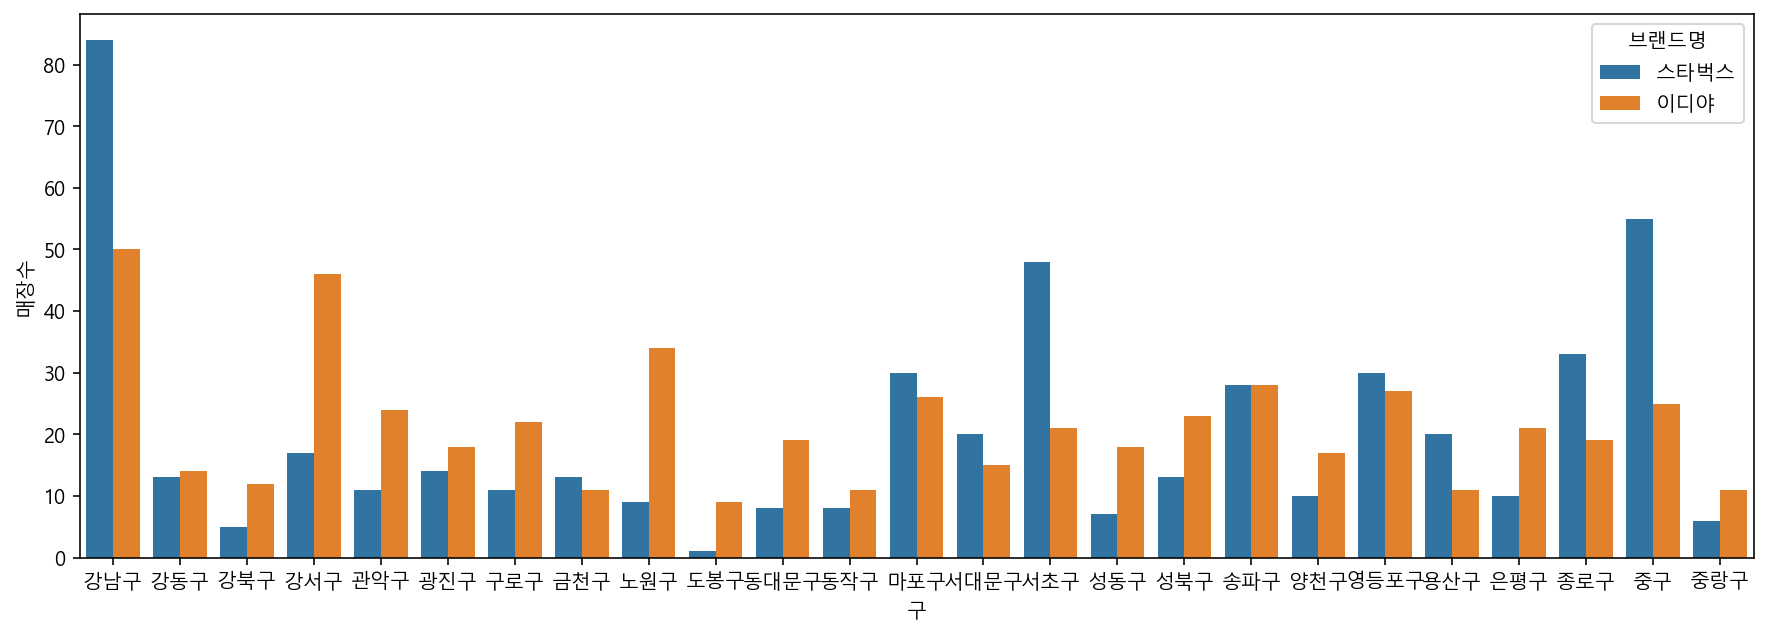

In [35]:
# seaborn의 barplot을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15,5))

sns.barplot(data=df_cafe_vs, x="구", y="매장수", hue="브랜드명")

<AxesSubplot:xlabel='시군구명,브랜드명'>

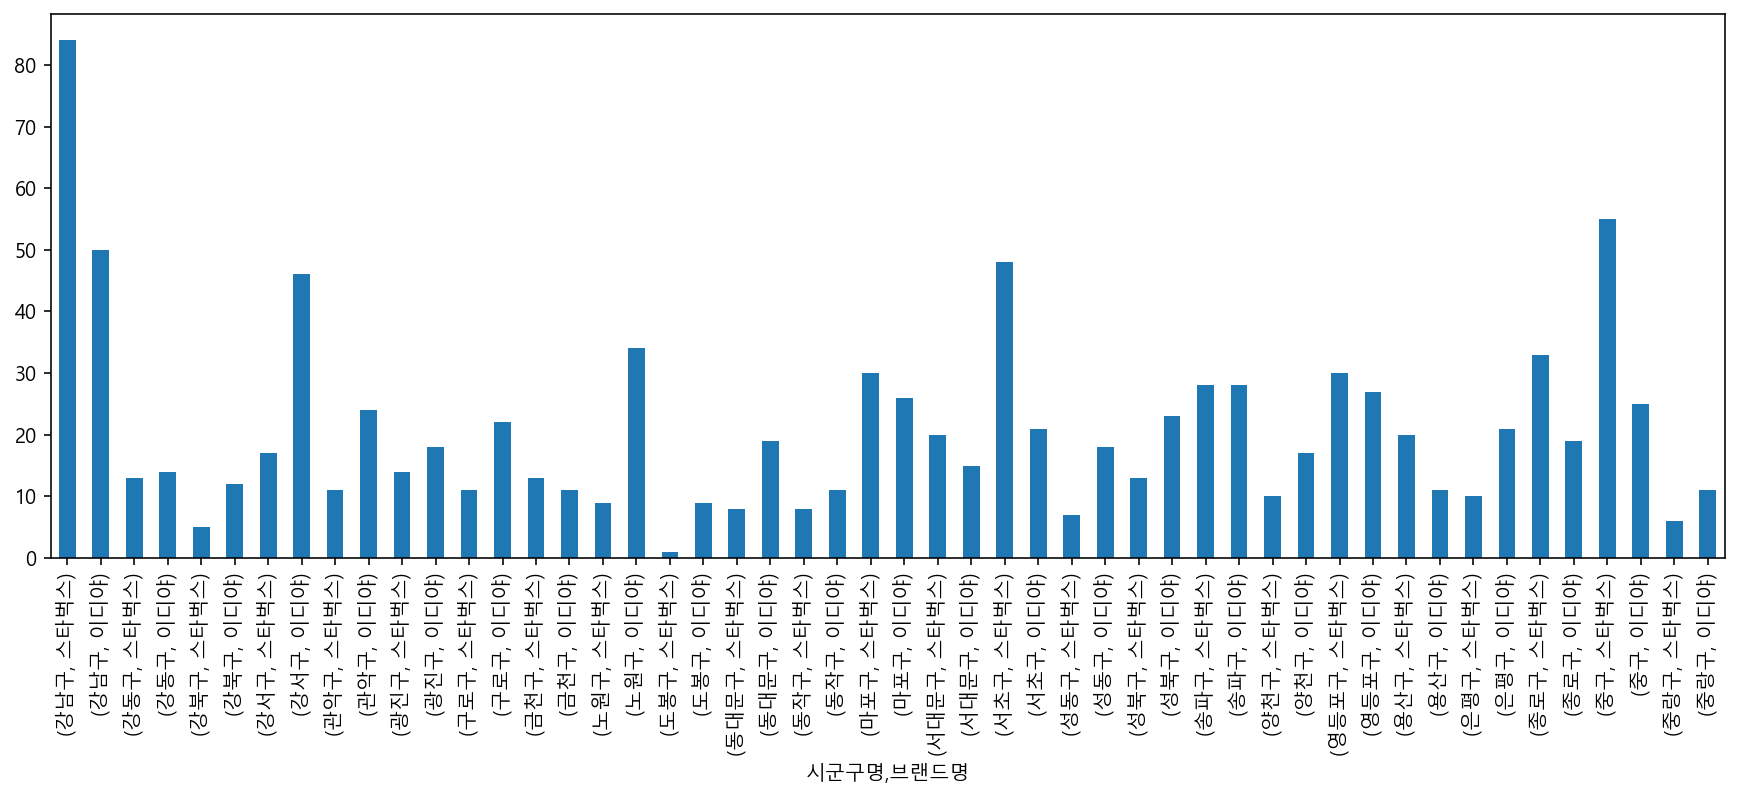

In [36]:
# groupby를 통해 "시군구명", "브랜드명"으로 그룹화를 하고 "상호명"의 갯수를 세어보자
# 갯수를 셀때는 count를 사용합니다.
group = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
group.plot.bar(figsize=(15, 5))

* unstack 이해하기 : https://pandas.pydata.org/docs/user_guide/reshaping.html

In [37]:
# 위에서 groupby 로 데이터를 집계한 결과를 시각화 해보자

# 첫번째 방법
# group.to_frame()

# 두번째 방법
# group.reset_index()

# 세번째 방법
# group.unstack()
group.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

<AxesSubplot:xlabel='시군구명'>

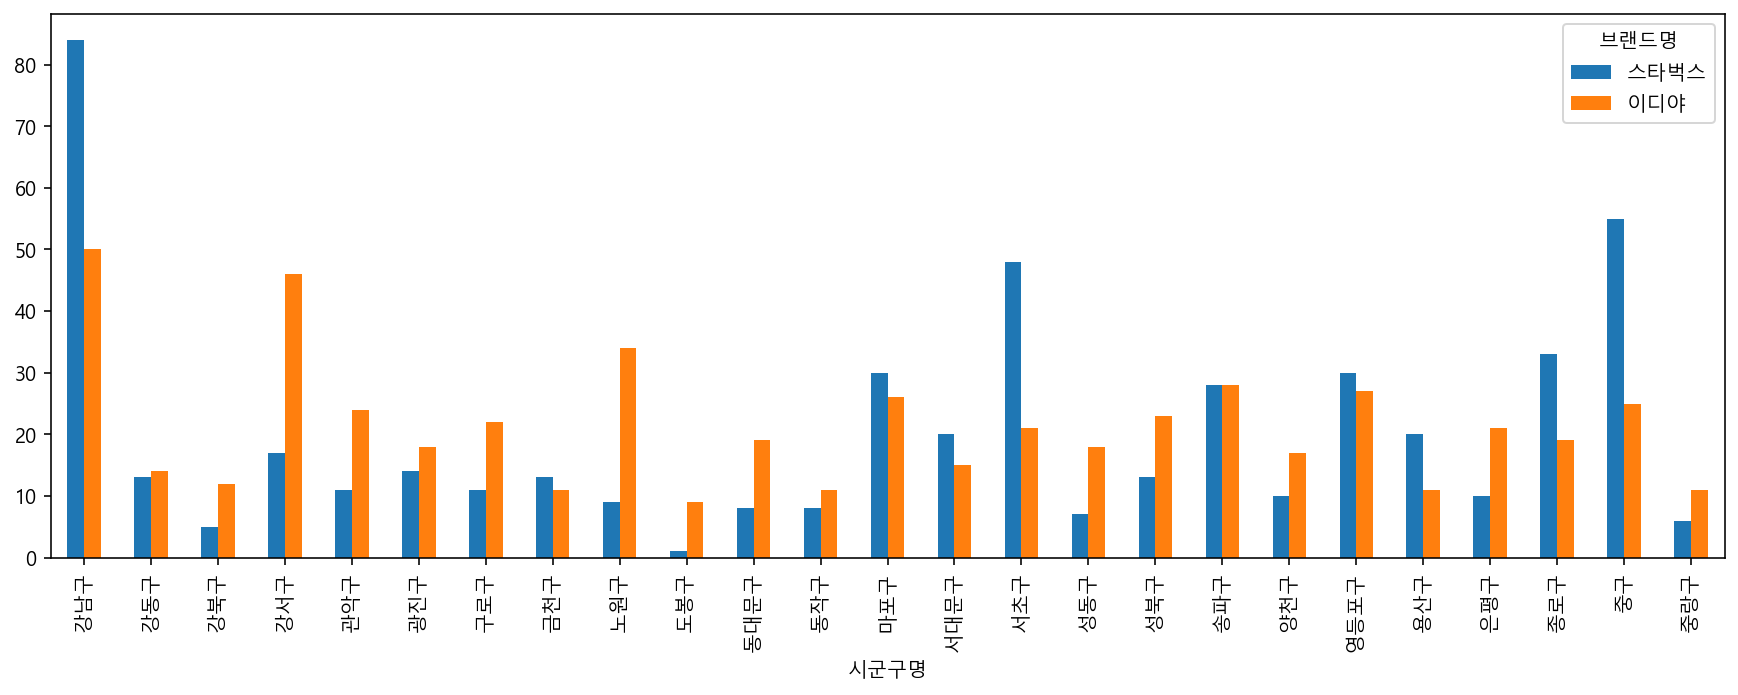

In [38]:
# 마지막 인덱스가 컬럼으로 오게 됨
group.unstack().plot.bar(figsize=(15, 5))

In [39]:
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [40]:
pivot.unstack().head()

상호명    
브랜드명 스타벅스 이디야
시군구명         
강남구    84  50
강동구    13  14
강북구     5  12
강서구    17  46
관악구    11  24

<AxesSubplot:xlabel='시군구명,브랜드명'>

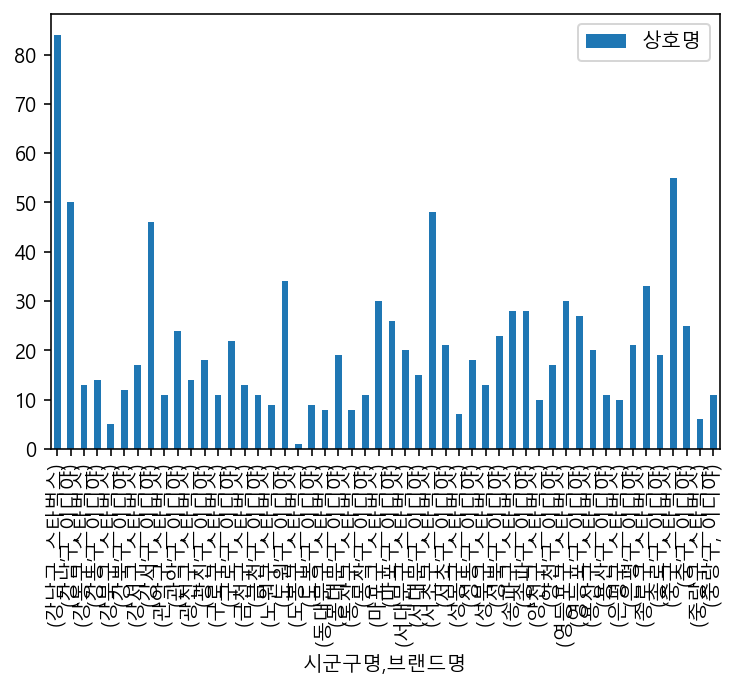

In [41]:
pivot.plot.bar() # 정신없음

<AxesSubplot:xlabel='시군구명'>

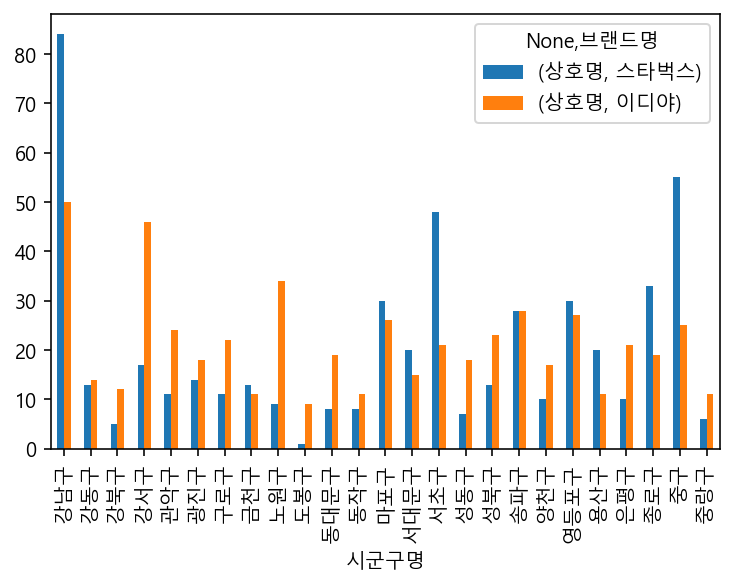

In [42]:
# unstack 하게되면 이쁘게 그래프 출력 됨
pivot.unstack().plot.bar()

<AxesSubplot:xlabel='시군구명'>

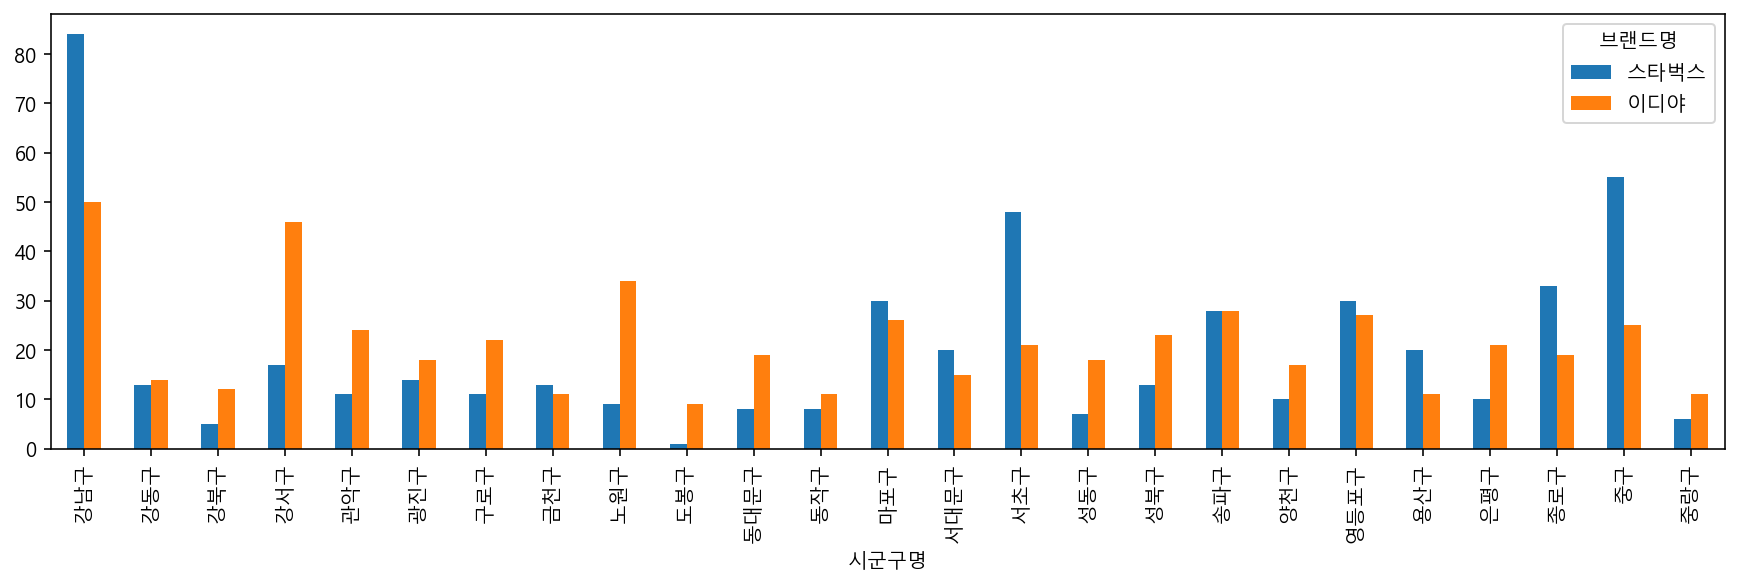

In [43]:
# pivot_table을 이용해서 구별 스타벅스, 이디야 매장수를 구해보자
# 피벗과 피벗테이블 가장 큰 차이점은 aggfunc의 유무
# 판다스의 장점 중 하나는 위에서처럼 구한 pivot_table을 시각화 해보기 쉬움
pivot = pd.pivot_table(data=df_cafe, index ="시군구명",
                       columns="브랜드명",
                       values="상호명", aggfunc="count")
pivot.plot.bar(figsize=(15,4))

<AxesSubplot:xlabel='시군구명', ylabel='count'>

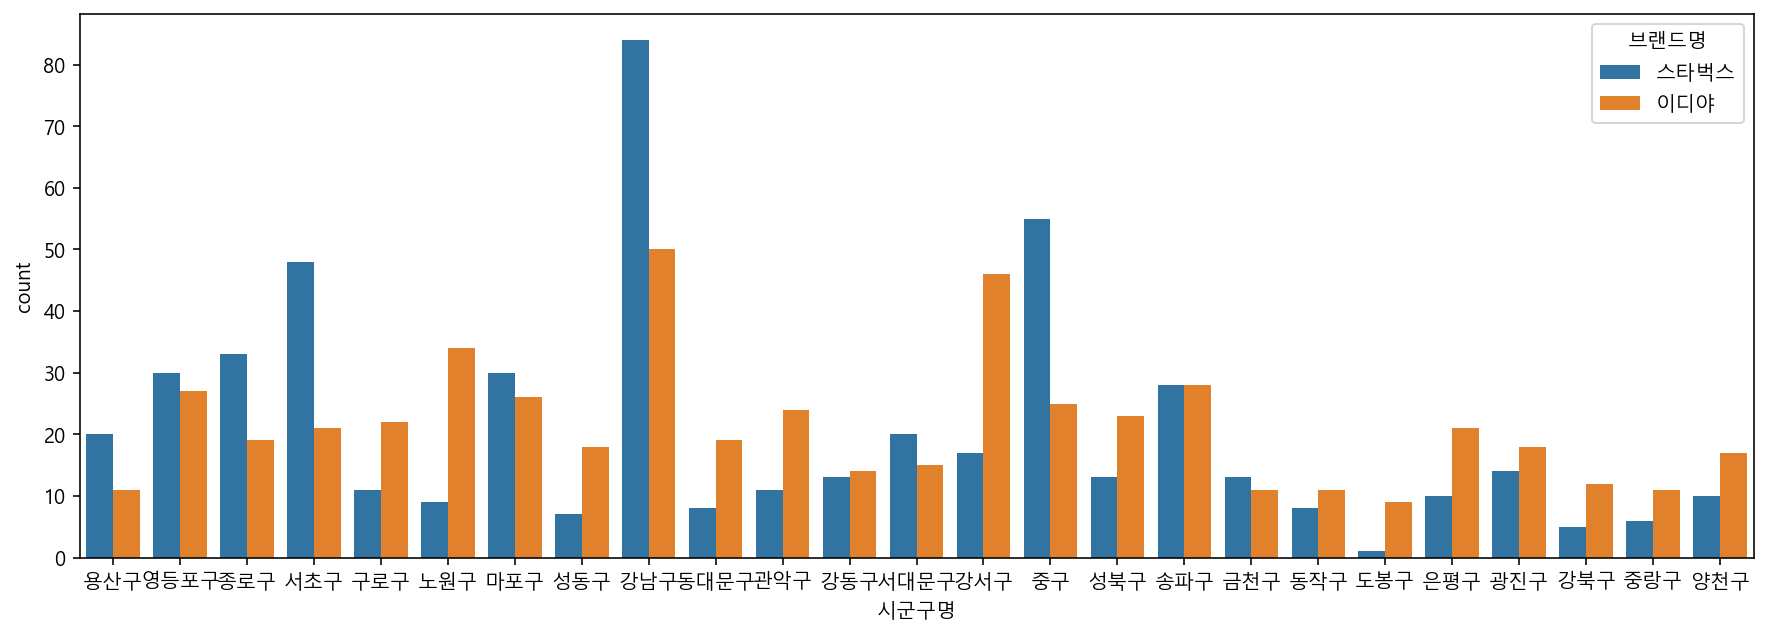

In [44]:
# pandas 로 시각화를 하는 방법도 있지만, seaborn의 countplot을 사용하면 해당 컬럼의 수를 계산해서 시각화를 해준다
# hue 옵션을 사용하게 되면 값에 따라 다른 색상으로 그리게 된다
# hue 옵션을 사용할 때는 2~3개 정도의 카테고리 형태의 데이터를 사용하는 것이 적합
# 여기에서는 브랜드명에 따라 다른 색상으로 표시할 수 있도록 한다
# seaborn의 가장 큰 장점
plt.figure(figsize = (15,5))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

# 8 Folium 으로 지도 활용하기
    * 지도 활용은 다음 링크 참초해서 봐보자
    * https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb

### 8.1 스타벅스 이디야 카페 매장 비교하기

In [45]:
import folium

In [46]:
# folium.Map([,])
lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()

In [47]:
m = folium.Map([lat, long], zoom_start = 12)
for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    title = df_cafe.loc[i, "상호명"] + " - " + df_cafe.loc[i, "도로명주소"] 

    
    folium.CircleMarker([sub_lat, sub_long],
                    radius = 3,
                    color = color,
                  tooltip=title).add_to(m)

m

NameError: name 'color' is not defined

In [ ]:
m = folium.Map([lat, long], zoom_start = 12) # tiles="Stamen Torner" 하면 흑백으로 지도 설정

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    title = df_cafe.loc[i, "상호명"] + " - " + df_cafe.loc[i, "도로명주소"] 
#     title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}" 
    
#     print(i, sub_lat, sub_long, title)
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "이디야":
        color = "blue"
    folium.CircleMarker([sub_lat, sub_long],
                    radius = 3,
                    color = color,
                  tooltip=title).add_to(m)

    # marker 종류 - CircleMarker
    # 지도를 표시하는 부분 
m

In [ ]:
# 한글 깨지면 이걸로 저장
m.save('index.html')

### 8.2 choropleth를 위한 GeoJSON 파일로드

In [48]:
# 서울의 행정구역 경계를 GeoJSON으로 표현한 파일이다
# 이 파일을 불러와 구별 스타벅스와 이디야의 매장수를 표현
geo_path = 'data/seoul_municipalities_geo_simple (1).json'

import json
geo_json = json.load(open(geo_path, encoding="UTF-8"))
# geo_json["features"][0]["properties"]["name"]
geo_json["features"][0]["properties"]["name"]


'강동구'

### 8.3 스타벅스 매장 분포

In [49]:
# df_cafe_vs 변수에 담긴 값을 통해 스타벅스의 매장 수를 구하고
# "브랜드명" 컬럼으로 스타벅스만 가져온다
df_cafe_vs.head()
df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"].copy()
df_star.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11


In [50]:
# geo_json 에서 구 이름 가져오기
geo_json["features"][0]["properties"]['name']

'강동구'

In [51]:
# df_cafe_starbucks로 스타벅스 매장 수 구하기
# choropleth의 색상은 fill_color = 'YLGn'을 사용

m = folium.Map(location=[lat, long])

folium.Choropleth(
    geo_data=geo_json,  # 서울 기준
    name='choropleth',
    data=df_star,    # 데이타
    columns=['구', '매장수'],  # 컬럼에 표시할 것
    key_on='feature.properties.name',       # features의 이름
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장 수'      # 오른쪽 위에있는 이름
).add_to(m)

m

### 8.4 이디야 매장 분포

In [52]:
# 이디야의 매장 수를 구한다
# "브랜드명" 컬럼으로 이디야만 가져옴

df_ediya = df_cafe_vs[df_cafe_vs["브랜드명"] == "이디야"].copy()
df_ediya.head()

,구,브랜드명,매장수
1,강남구,이디야,50
3,강동구,이디야,14
5,강북구,이디야,12
7,강서구,이디야,46
9,관악구,이디야,24


In [53]:
m = folium.Map(location=[lat, long])

folium.Choropleth(
    geo_data=geo_json,  # 서울 기준
    name='choropleth',
    data=df_ediya,    # 데이타
    columns=['구', '매장수'],  # 컬럼에 표시할 것
    key_on='feature.properties.name',       # features의 이름
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장 수'      # 오른쪽 위에있는 이름
).add_to(m)

m

In [54]:
# CircleMarker랑 같이 합쳐서 그릴 수 있음

m = folium.Map(location=[lat, long])

folium.Choropleth(
    geo_data=geo_json,  # 서울 기준
    name='choropleth',
    data=df_ediya,    # 데이타
    columns=['구', '매장수'],  # 컬럼에 표시할 것
    key_on='feature.properties.name',       # features의 이름
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장 수'      # 오른쪽 위에있는 이름
).add_to(m)

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    title = df_cafe.loc[i, "상호명"] + " - " + df_cafe.loc[i, "도로명주소"] 
#     title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}" 
    
#     print(i, sub_lat, sub_long, title)
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "이디야":
        color = "blue"
    folium.CircleMarker([sub_lat, sub_long],
                    radius = 3,
                    color = color,
                  tooltip=title).add_to(m)
m


In [55]:
# 한글 깨지면 이걸로 저장
m.save('index.html')

### 8.5 매장수 크기를 반영해 CircleMarker 그리기
    * Pandas의 reshaping data 활용하기

In [56]:
# df_vs 라는 변수에 구별 브랜드명을 pivot해서 스타벅스와 이디야 매장을 비교할 수 있는 형태로 만들어준다
# 그리고 ["스타벅스", "이디야"]로 컬럼명을 변경해주고
# 스타벅스와 이디야의 매장을 비교한 값을 "매장수 비교" 컬럼에 담아준다.
df_vs = df_cafe_vs.pivot(index = "구", columns="브랜드명", values="매장수")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0
df_vs

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False
광진구,14,18,False
구로구,11,22,False
금천구,13,11,True
노원구,9,34,False


In [57]:
# 간단한 함수를 사용해서 스타벅스가 이디야보다 매장수가 많을 때 1을 출력하도록 해보자
df_vs["매장수비교"] = df_vs["매장수비교"].astype(float)
df_vs.head()
# float으로 바꿔준 이유: radius로 표현할 때 이 아이의 자료형이 float형 / 그래야 오류가 나지 않음
#astype 자료형 변경

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,1.0
강동구,13,14,0.0
강북구,5,12,0.0
강서구,17,46,0.0
관악구,11,24,0.0


In [58]:
# 구를 컬럼명으로 사용하기 위해 reset_index 를 해준다
# 데이터프레임을 df_vs에 저장
df_vs = df_vs.reset_index()
df_vs.head()
# reset_index() 사용하면 index가 컬럼으로 오게됨

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,84,50,1.0
1,강동구,13,14,0.0
2,강북구,5,12,0.0
3,강서구,17,46,0.0
4,관악구,11,24,0.0


### 8.6 Choropleth로 매장수의 많고 적음에 따라 표현하기

In [59]:
# 스타벅스 매장 수 구하기
# choropleth의 색상은 fill_color = 'BuGn'을 사용
# CircleMarker의 radius 지정시 int 타입일 때 다음과 같은 타입오류가 나서
# float type으로 변경이 필요함
# TypeError: Object of type 'int64' is not JSON serializable

m = folium.Map(location=[lat, long])

folium.Choropleth(
    geo_data=geo_json,  # 서울 기준
    name='choropleth',
    data=df_vs,    # 데이타
    columns=['구', '매장수비교'],  # 컬럼에 표시할 것
    key_on='feature.properties.name',       # features의 이름
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'      # 오른쪽 위에있는 이름
).add_to(m)

# 써클마커


m

In [60]:
# 피벗테이블의 기본값이 수치형데이터를 평균화 시켜주기때문에 위도, 경도, 평균값을 안적어주었음에도 불구하고
# 기본값으로 디폴트값 출력됨
df_gu_mean = df_cafe.pivot_table(index="시군구명", values=["경도", "위도"], aggfunc="mean")
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean.head()

,시군구명,경도,위도
0,강남구,127.046129,37.505744
1,강동구,127.135417,37.540316
2,강북구,127.022897,37.631146
3,강서구,126.837883,37.555966
4,관악구,126.935210,37.482054


In [61]:
df_vs = df_vs.merge(df_gu_mean, how='inner', left_on="구", right_on="시군구명")
df_vs.head()
# 합칠거.merge(또 합칠 데이터, 합치는 방법(결측치 유무로 합칠 방법 판단), 키 값들)

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,84,50,1.0,강남구,127.046129,37.505744
1,강동구,13,14,0.0,강동구,127.135417,37.540316
2,강북구,5,12,0.0,강북구,127.022897,37.631146
3,강서구,17,46,0.0,강서구,126.837883,37.555966
4,관악구,11,24,0.0,관악구,126.935210,37.482054


In [62]:
# 구별로 CircleMarker를 표현하기 위해서는 각 구의 위경도 값을 구해야 합니다.
# 구별 위도와 경도를 가져와 평균 값을 구해서 사용
# 특정 구의 위경도의 평균을 구해준다

for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    print(df_vs.loc[i, "구"], sub_lat, sub_long)

강남구 37.50574379723647 127.04612924851477
강동구 37.54031612892801 127.13541705768304
강북구 37.63114579912596 127.02289728220342
강서구 37.555966339807725 126.8378831992901
관악구 37.482054429288624 126.93521011850088
광진구 37.54376971811047 127.08329747837426
구로구 37.494060747742985 126.87745596750014
금천구 37.469286927652114 126.8921962213389
노원구 37.6423933051354 127.06717137772726
도봉구 37.66576544822702 127.04047354226732
동대문구 37.580700635471146 127.05492813212528
동작구 37.49570035386574 126.94890217041826
마포구 37.55548154197544 126.92300493503947
서대문구 37.566284229288875 126.93762476470604
서초구 37.49301091104672 127.01402160112261
성동구 37.55457943854072 127.03635911128876
성북구 37.59886024576222 127.02565170180024
송파구 37.50117991460961 127.1141353230951
양천구 37.52891847594384 126.86196683493064
영등포구 37.520781009585264 126.91390000535677
용산구 37.53468952777027 126.98251254628539
은평구 37.61406806596294 126.92041650466946
종로구 37.57615434804085 126.98723628325011
중구 37.56289726978085 126.98657335073601
중랑구 37.5960

### 8.7 신문기사와 유사하게 매장수에 따라 원의 크기를 다르게 그리기

In [63]:
df_vs.head(1)

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,84,50,1.0,강남구,127.046129,37.505744


In [64]:
np.sqrt(50)

7.0710678118654755

In [65]:
m = folium.Map(location=[lat, long])

folium.Choropleth(
    geo_data=geo_json,  # 서울 기준
    name='choropleth',
    data=df_vs,    # 데이타
    columns=['구', '매장수비교'],  # 컬럼에 표시할 것
    key_on='feature.properties.name',       # features의 이름
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'      # 오른쪽 위에있는 이름
).add_to(m)

# 써클마커


m

In [66]:
m = folium.Map(location=[lat, long], zoom_start = 11)

folium.Choropleth(
    geo_data=geo_json,  # 서울 기준
    name='choropleth',
    data=df_vs,    # 데이타
    columns=['구', '매장수비교'],  # 컬럼에 표시할 것
    key_on='feature.properties.name',       # features의 이름
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'      # 오른쪽 위에있는 이름
).add_to(m)

for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    cafes = ["스타벅스", "이디야"]
    for cafe in cafes:
        cafe_count = df_vs.loc[i, cafe]
        
        
        gu = df_vs.loc[i, "구"]              
        tooltip = f"{gu} {cafe} : {cafe_count}"  # 갖다대면 구 / 몇갠지 나오게 하기 위함
        
        radius = np.sqrt(cafe_count) * 3  # 동그라미 존나 작아짐
        
        color = "green"
        if cafe == "이디야":
            color = "blue"
            sub_long += 0.01  # 겹쳐보이지 않게 하기 위함
#         else:
#             color = "green"
        folium.CircleMarker([sub_lat, sub_long],
                          # radius = float(cafe_count),
                            radius = radius,
                            color = color,
                            fill = True,  # 색 채워짐
                            tooltip = tooltip
                           ).add_to(m)
    # 가장 기본 값(위도, 경도)
m

In [67]:
# 한글 깨지면 이걸로 저장
m.save('index.html')